# Unit 4 Project
After understanding how neural networks work, implementing some basic architectures using deep learning frameworks, and learning about some advanced techniques to help enhance our neural networks' models results, it's time to apply what you learned! So let's start

## Project Overview
In this project, you will build a neural network model to classify images from CIFAR 10 dataset.

The CIFAR-10 dataset consists of 60000 32x32 color images of 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. [source](https://www.cs.toronto.edu/~kriz/cifar.html)

Unlike the previous projects, there will be no code cells to fill, the only task you have is to build the best possible model using the techniques you learned about in this unit. But we will guide you with some directives.

You will have enough guidance throughout the project and your work will be reviewed and graded by a teacher assistant. You can also reach out to the TA via slack whenever you feel you are stuck.

## Some guidelines
- Please use text cells to write the questions' answers in a good way.
- Don't forget to save the different models you tested so you will be able to report the different results you got and the impact of the different techniques you tested later.

## Getting started
- In case you don't have a GPU, it is recommended that you use google colab. Start by cloning this repository, then open [google colab](https://colab.research.google.com/), click on File > Upload notebook, and finally upload the ```.ipynb``` file from the repository you have just cloned! Don't forget to change the runtime to GPU. If you want to work in your local environment just open it using jupyter notebook.



## Dataset

1.   Load the dataset (**hint**: it's available here https://keras.io/api/datasets/)
2.   Display few images of each class.



In [8]:
from loguru import logger

In [1]:
# Your code here

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

/Users/titiksha/dev/cla-Unit4-Project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.


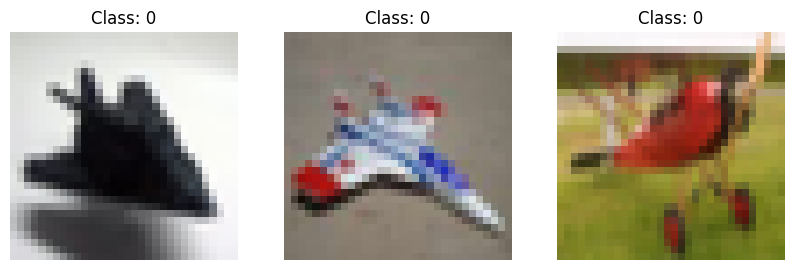

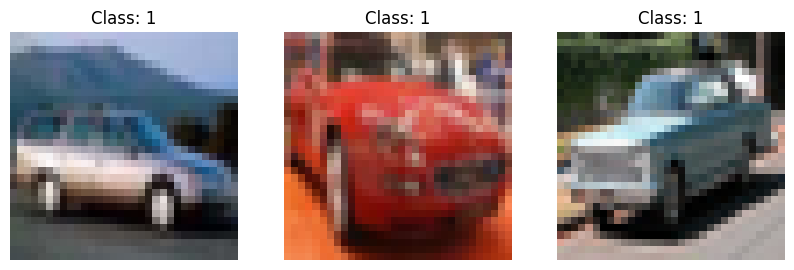

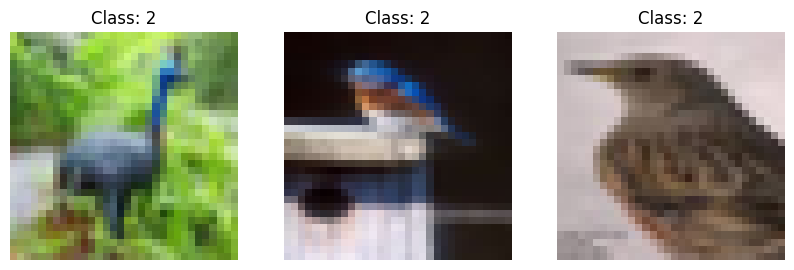

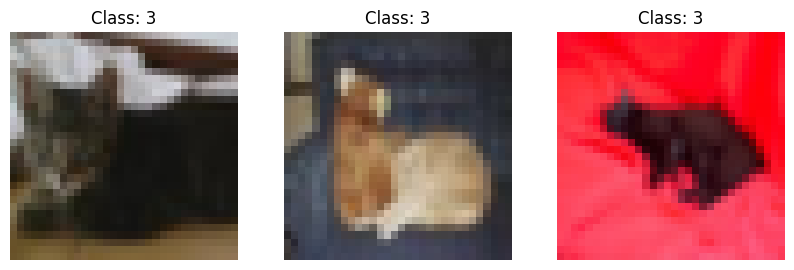

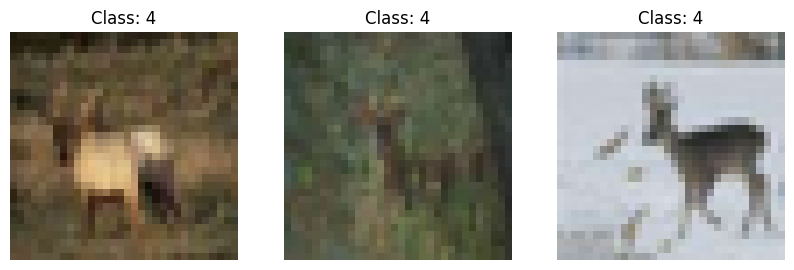

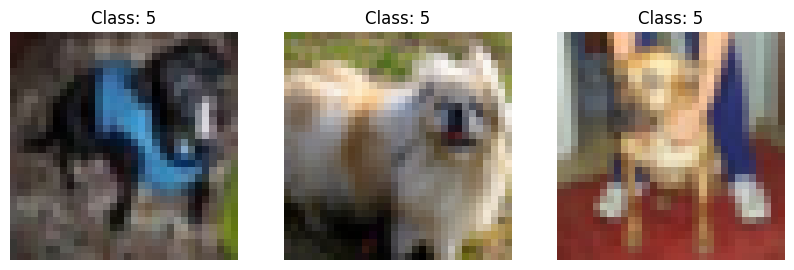

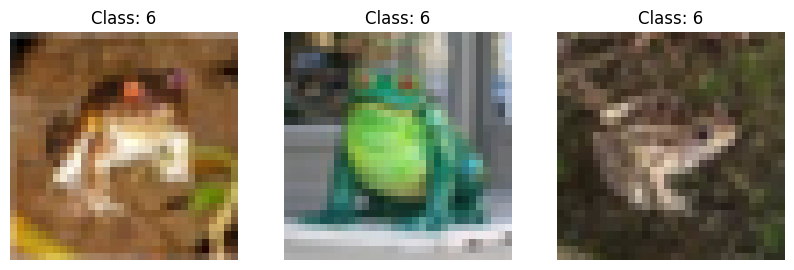

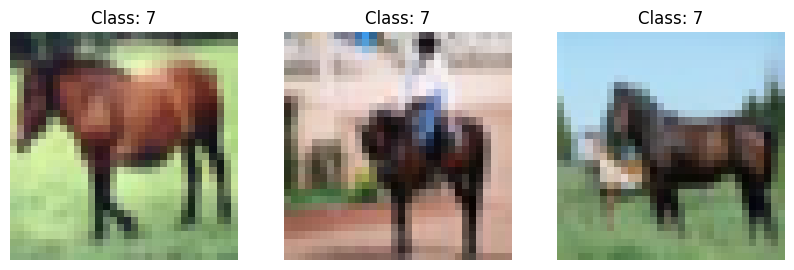

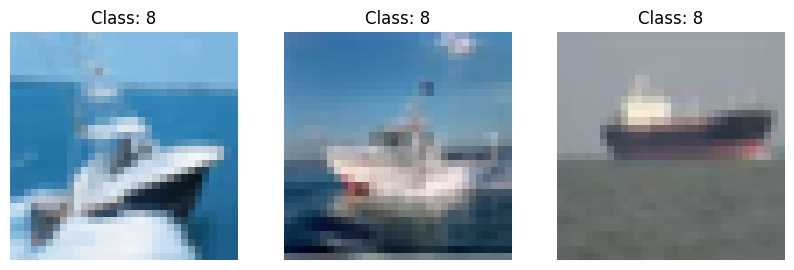

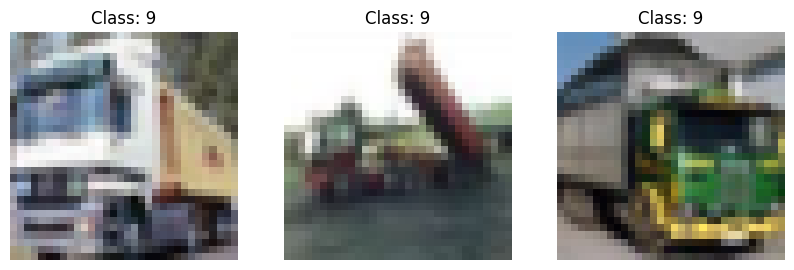

In [2]:
import matplotlib.pyplot as plt
import numpy as np

num_images_per_class = 3

for class_label in np.unique(y_train):
     class_indices = np.where(y_train == class_label)[0]

     fig, axes = plt.subplots(1, min(num_images_per_class, len(class_indices)), figsize=(10, 3))
     for i in range(min(num_images_per_class, len(class_indices))):
      axes[i].imshow(x_train[class_indices[i]])
      axes[i].set_title(f"Class: {class_label}")
      axes[i].axis('off')

     plt.show()

## Baseline Model

1.   Build a basline model using only dense layers, activation function of your choice, and the adapted cost function for this problem.
2.   Train and evaluate your model
3.   Analyze the result



/Users/titiksha/dev/cla-Unit4-Project/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2665 - loss: 2.0357 - val_accuracy: 0.3670 - val_loss: 1.7944
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3667 - loss: 1.7589 - val_accuracy: 0.4040 - val_loss: 1.6833
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4012 - loss: 1.6667 - val_accuracy: 0.4168 - val_loss: 1.6439
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4217 - loss: 1.6232 - val_accuracy: 0.4338 - val_loss: 1.5966
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4422 - loss: 1.5657 - val_accuracy: 0.4330 - val_loss: 1.6164
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4459 - loss: 1.5478 - val_accuracy: 0.4410 - val_loss: 1.5713
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4532 - loss: 1.5288 - val_accuracy: 0.4318 - val_loss: 1.5788
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4599 - loss: 1.5063 - val_accuracy: 0.

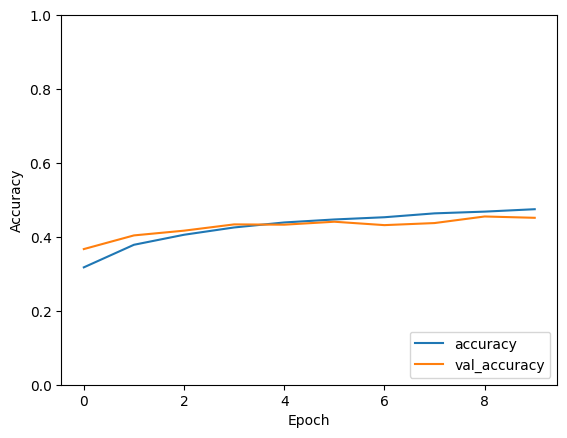

In [3]:
# Your code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


## Accelerating the training

1.   Add batch normalization layers to your network in order to accelerate the training. Start with adding batch norm layer before each of your activation layers.
2.   Analyze the new results
3.   Change the position of the batch norm layers so they will be after the activation layers. Compare the results.
   



Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3563 - loss: 1.8262 - val_accuracy: 0.4538 - val_loss: 1.5353
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4671 - loss: 1.4964 - val_accuracy: 0.4810 - val_loss: 1.4427
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5035 - loss: 1.4025 - val_accuracy: 0.5070 - val_loss: 1.3899
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5305 - loss: 1.3235 - val_accuracy: 0.5146 - val_loss: 1.3735
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5487 - loss: 1.2719 - val_accuracy: 0.5202 - val_loss: 1.3509
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5624 - loss: 1.2344 - val_accuracy: 0.5282 - val_loss: 1.3359
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5797 - loss: 1.1892 - val_accuracy: 0.5388 - val_loss: 1.3349
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5890 - loss: 1.1565 - val_accuracy: 0.

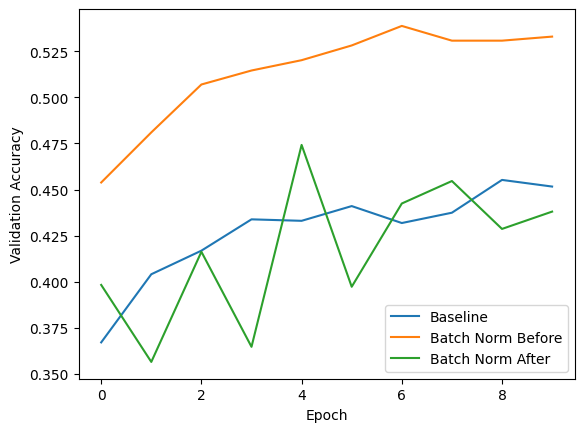

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

# Model with BatchNormalization before activation
model_bn_before = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    BatchNormalization(),
    Dense(128),
    tf.keras.layers.Activation('relu'),
    BatchNormalization(),
    Dense(64),
    tf.keras.layers.Activation('relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model_bn_before.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_bn_before = model_bn_before.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

test_loss_bn_before, test_accuracy_bn_before = model_bn_before.evaluate(x_test, y_test)
print(f"Batch Norm Before - Test Loss: {test_loss_bn_before:.4f}")
print(f"Batch Norm Before - Test Accuracy: {test_accuracy_bn_before:.4f}")


# Model with BatchNormalization after activation
model_bn_after = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128),
    tf.keras.layers.Activation('relu'),
    BatchNormalization(),
    Dense(64),
    tf.keras.layers.Activation('relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model_bn_after.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_bn_after = model_bn_after.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

test_loss_bn_after, test_accuracy_bn_after = model_bn_after.evaluate(x_test, y_test)
print(f"Batch Norm After - Test Loss: {test_loss_bn_after:.4f}")
print(f"Batch Norm After - Test Accuracy: {test_accuracy_bn_after:.4f}")

# Plotting to compare
plt.plot(history.history['val_accuracy'], label='Baseline')
plt.plot(history_bn_before.history['val_accuracy'], label='Batch Norm Before')
plt.plot(history_bn_after.history['val_accuracy'], label='Batch Norm After')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## Reducing the overfitting


1.   Apply the dropout technique to reduce the overfitting your model is suffering from
2.   Try different dropout rates



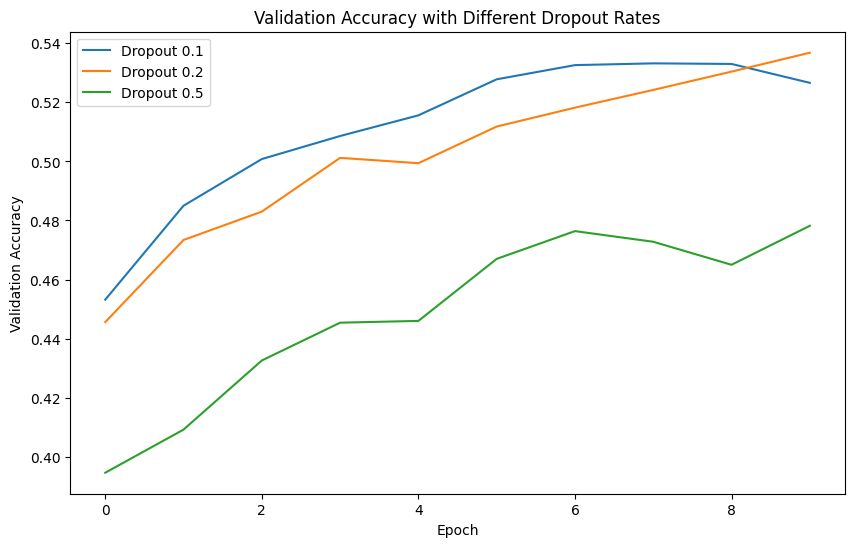

In [5]:
# Your code here
from tensorflow.keras.layers import Dropout

dropout_rates = [0.1, 0.2, 0.5]
histories = []

for dropout_rate in dropout_rates:
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        BatchNormalization(),
        Dense(128),
        tf.keras.layers.Activation('relu'),
        Dropout(dropout_rate),  # Apply dropout
        BatchNormalization(),
        Dense(64),
        tf.keras.layers.Activation('relu'),
        Dropout(dropout_rate),  # Apply dropout
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=0)
    histories.append(history)

plt.figure(figsize=(10, 6))
for i, dropout_rate in enumerate(dropout_rates):
    plt.plot(histories[i].history['val_accuracy'], label=f'Dropout {dropout_rate}')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy with Different Dropout Rates')
plt.legend()
plt.show()

## Trying different model's parameters
1. Try changing the number of layers, the number of hidden neurons in each layer, the activation functions, the weight initialization method...
2. Compare the results you got for each evaluated model.

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.2370 - loss: 2.2522 - val_accuracy: 0.2248 - val_loss: 2.2538
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3158 - loss: 1.8885 - val_accuracy: 0.3140 - val_loss: 1.8771
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3465 - loss: 1.8077 - val_accuracy: 0.3740 - val_loss: 1.7793
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3636 - loss: 1.7653 - val_accuracy: 0.3984 - val_loss: 1.7052
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3796 - loss: 1.7260 - val_accuracy: 0.4048 - val_loss: 1.6846
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3809 - loss: 1.7119 - val_accuracy: 0.4054 - val_loss: 1.6920
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3862 - loss: 1.7002 - val_accuracy: 0.4134 - val_loss: 1.6480
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3947 - loss: 1.6754 - val_accuracy: 0.

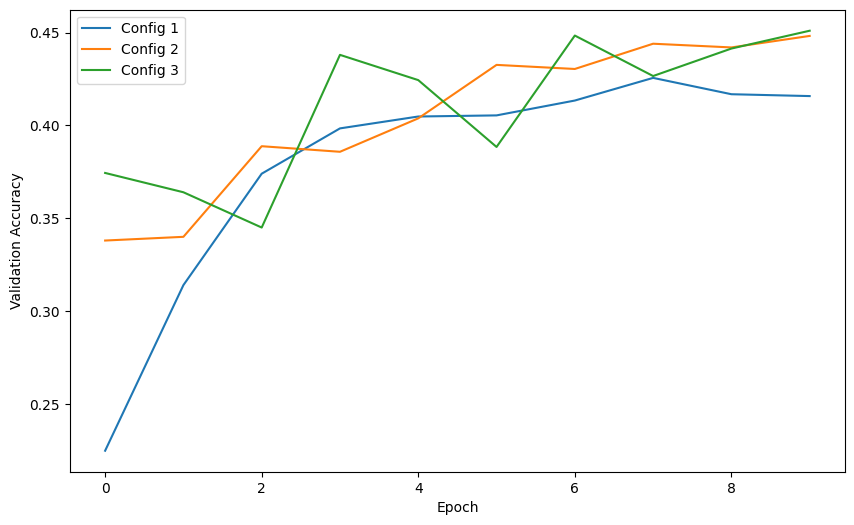

In [6]:
# Your code here
def build_and_train_model(num_layers, neurons_per_layer, activation, kernel_initializer, dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))

    for _ in range(num_layers):
        model.add(Dense(neurons_per_layer, activation=activation, kernel_initializer=kernel_initializer))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
        model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)
    return model, history


# Experiment with different model configurations
model_configs = [
    {'num_layers': 3, 'neurons_per_layer': 256, 'activation': 'relu', 'kernel_initializer': 'glorot_uniform', 'dropout_rate': 0.2},
    {'num_layers': 4, 'neurons_per_layer': 128, 'activation': 'elu', 'kernel_initializer': 'he_normal', 'dropout_rate': 0.3},
    {'num_layers': 2, 'neurons_per_layer': 512, 'activation': 'sigmoid', 'kernel_initializer': 'glorot_normal', 'dropout_rate': 0.1},
]

histories = []
for config in model_configs:
  model, history = build_and_train_model(**config)
  histories.append(history)
  _, accuracy = model.evaluate(x_test, y_test, verbose=0)
  print(f"Test Accuracy for config {config}: {accuracy}")

# Plotting validation accuracy for comparison
plt.figure(figsize=(10, 6))
for i, config in enumerate(model_configs):
    plt.plot(histories[i].history['val_accuracy'], label=f"Config {i+1}")
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## Few more experiments to go

1.   **Exploring more regularization techniques:** Try at least 2 regularization techniques separately and combined.  A non-exhaustive list of regularization techniques you can test


> * L1 and L2 regularization
* Early stopping
* Data augmentation
* Decreasing the complexity of the model

2.   **Hyperparameters' tuning:** Try to tune the learning parameters using the tuning strategies we learned about:

> * Learning rate
* Mini-batch size
* The optimizer and its parameters

3. Analyze the impact of each of the applied techniques. What were the most effective ones? What were the hypeparameters that affects the results the most?


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1179 - loss: 13.9169 - val_accuracy: 0.0970 - val_loss: 2.7363
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0972 - loss: 2.7363 - val_accuracy: 0.0958 - val_loss: 2.7375
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1003 - loss: 2.7365 - val_accuracy: 0.0958 - val_loss: 2.7361
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0970 - loss: 2.7366 - val_accuracy: 0.0958 - val_loss: 2.7360
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0999 - loss: 2.7363 - val_accuracy: 0.0958 - val_loss: 2.7361
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0922 - loss: 2.7363 - val_accuracy: 0.0950 - val_loss: 2.7374
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0999 - loss: 2.7363 - val_accuracy: 0.1024 - val_loss: 2.7361
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0979 - loss: 2.7362 - val_accuracy: 0

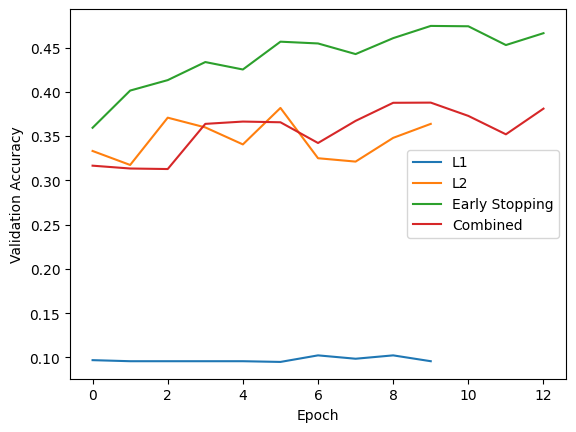

In [ ]:
# Your code here
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# Model with L1 regularization

logger.debug("Model with L1 regularization")

model_l1 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(10, activation='softmax')
])

model_l1.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
history_l1 = model_l1.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Model with L2 regularization
logger.debug("Model with L2 regularization")
model_l2 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

model_l2.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
history_l2 = model_l2.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


# Model with Early Stopping
logger.debug("Model with Early Stopping")
model_early_stopping = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_early_stopping.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Stop if val_loss doesn't improve for 3 epochs

history_early_stopping = model_early_stopping.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=0)


#Combined L2 and Early stopping
logger.debug("Combined L2 and Early stopping")
model_combined = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

model_combined.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_combined = model_combined.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=0)


print("L1 - Test Accuracy:", model_l1.evaluate(x_test, y_test, verbose=0)[1])
print("L2 - Test Accuracy:", model_l2.evaluate(x_test, y_test, verbose=0)[1])
print("Early Stopping - Test Accuracy:", model_early_stopping.evaluate(x_test, y_test, verbose=0)[1])
print("Combined - Test Accuracy:", model_combined.evaluate(x_test, y_test, verbose=0)[1])

plt.plot(history_l1.history['val_accuracy'], label='L1')
plt.plot(history_l2.history['val_accuracy'], label='L2')
plt.plot(history_early_stopping.history['val_accuracy'], label='Early Stopping')
plt.plot(history_combined.history['val_accuracy'], label='Combined')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## Answer the following questions
*Hint: Do your own research to answer these questions, none of the questions is answered in the previous lessons*


1.   Why we can’t reach a good accuracy on this task?
2.   Explain why fully connected neural networks are Not efficient on image tasks
3.   What architecture can be used  for such tasks? Why they are more adapted for that?

\

1.We can't get good accuracy on this task becuse fully conneccted neural networks or FCNN are not efficient on image task.

2.CIFAR-10 images are 32x32 with three color channels (RGB), resulting in 32x32x3 = 3072 input features per image.(**High Dimentionality**)
It might cause **overfitting**.
As image resolution increases (e.g., 128x128, 224x224), the number of input features grows quadratically, making FCNNs **impractical for higher-resolution images.**
Due to the large number of connections between neurons, FCNNs are **computationally expensive **for image data, requiring significant memory and processing power.

3.**CNN** architecture can be used for such task.
CNNs use convolutional layers with filters (kernels) to process small regions of the image (e.g., 3x3 or 5x5 patches).
Unlike FCNNs, CNNs share weights across spatial locations (filter weights), drastically reducing the number of parameters.
Pooling layers (e.g., max pooling) reduce the spatial dimensions of feature maps, making the network computationally efficient and less prone to overfitting.
